# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


>>>>>>>>>>

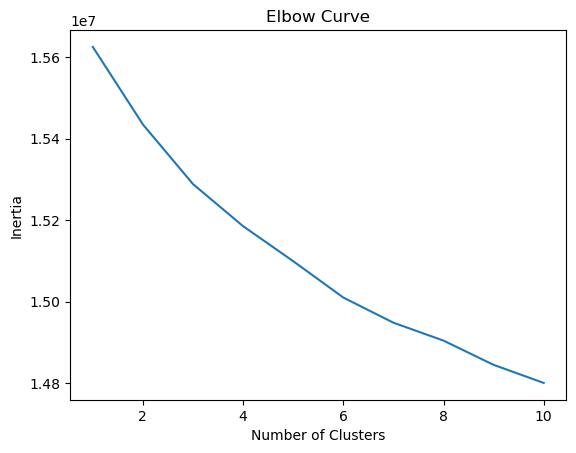

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

B = people['text']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(B)

# Empty list for inertia values
inertia_values = []

# fit k-means models for different k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    print(">", end="")

# plot the elbow curve
plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [3]:
# Cluster using KMeans,number of clusters =7 from elbow method
k = 7
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

X = vectorizer.fit_transform(people['text'])

# Print top terms for each cluster
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print(f"Cluster {i}:")
    top_terms = [terms[ind] for ind in kmeans.cluster_centers_[i].argsort()[:-10:-1]]
    print(top_terms)
    
# Assign labels to each data point
labels = kmeans.labels_
people['cluster'] = labels

# Print summary of clusters
for i in range(k):
    print(f"Cluster {i}: {len(people[people['cluster'] == i])} people")
    print(people[people['cluster'] == i]['name'].tolist())

Cluster 0:
['music', 'album', 'band', 'released', 'new', 'born', 'orchestra', 'records', 'including']
Cluster 1:
['university', 'research', 'professor', 'american', 'school', 'international', 'science', 'member', 'college']
Cluster 2:
['film', 'films', 'award', 'best', 'festival', 'television', 'director', 'directed', 'international']
Cluster 3:
['league', 'season', 'played', 'team', 'football', 'games', 'career', 'born', 'coach']
Cluster 4:
['new', 'art', 'york', 'work', 'university', 'museum', 'american', 'city', 'born']
Cluster 5:
['born', 'world', 'new', 'university', 'years', 'won', 'american', 'work', 'series']
Cluster 6:
['member', 'served', 'party', 'election', 'born', 'president', 'minister', 'university', 'state']
Cluster 0: 4598 people
['G-Enka', 'Aaron LaCrate', 'Alexandros Mouzas', 'Chris Batstone', 'Faith Soloway', 'Th%C3%BCring Br%C3%A4m', 'Rob Sheffield', 'Bob Havens', 'Susan Christie', 'Nobuo Uematsu', 'Judi Silvano', 'Martin Iveson', 'Armen Ra', 'Cajjmere Wray', 'Angu